# Read-in Datafile:

In [1]:
#opening file contents

input_fileob = open("romeoandjuliet.txt", 'r') #generate a file object for reading
file_contents = input_fileob.read().lower() #make all of the words lowercase to make sure it will work with our unique word list
input_fileob.close() #closing file object for safety

#To lower the risk of punctuation or special characters getting in the way strip the entire file down to just a word list

dword_list = file_contents.split() #finds words, but they will have punctuation attatched to them

clean_word_list = [word.replace('.',"").replace('!',"").replace('?',"").
           replace(',',"").replace(';',"").replace(':',"").
           replace(']',"").replace('[',"").replace(')',"").
           replace('(',"").replace('-',"").replace('"',"").replace("' ","")
           for word in dword_list]

# now the manuscript is digested to just the words
#print(clean_word_list)


# Generate Dictionary of Unique Words

In [3]:
#unique words list:

un_words = set(clean_word_list)

#making the dictionary:

word_counts = {}
for un_word in un_words:
    count = clean_word_list.count(un_word)
    word_counts[un_word] = count #now the unique words are keys and the counts are their values

#Troubleshooted unique words within the list to make sure
len(un_words) #3764
len(clean_word_list) #25788

#print(len(un_words)) = 3764  
#print(len(clean_word_list = 25788

for un_word, count in word_counts.items():
    if count == 0:
        print(str(un_word) + " pops up: " + str(count) + " times." ) #prints nothing


sum_of_counts = sum(word_counts.values())
#print(sum_of_counts) = 25788 which equals the total word count

# Generate Barplot:

Text(0,0.5,'Times Words Used')

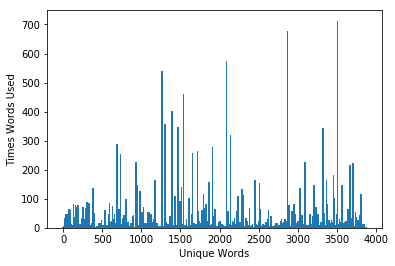

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#Input data:
word_stats_rj = plt.bar(range(len(word_counts.keys())),word_counts.values(), 20) 
plt.xlabel("Unique Words") 
plt.ylabel("Times Words Used")

#### Analysis of Word Counts:  
   



In [5]:
#10 most common words:

values_sort = sorted(word_counts.values())
#print(values_sort) got a bunch of 1's; top 11 were 290, 319, 344, 347, 359, 401, 461, 540, 575, 679, 713

for key,value in sorted(word_counts.items()): 
    if value > 290:
        print("'" + key + "'" + "(" + str(value) +")"+",")  

used_once_list = []        
for key,value in sorted(word_counts.items()): 
    if value < 2:
        used_once_list.append(key)  

#len(used_once_list) # =2087

#print(used_once_list)

        

'a'(461),
'and'(713),
'i'(575),
'in'(319),
'is'(344),
'my'(359),
'of'(401),
'that'(347),
'the'(679),
'to'(540),


The most used words are 'and' (713), 'the' (680), 'I'(585), 'to'(541), 'a'(468), 'of'(401), 'my'(360), 'that'(347),'is'(344), and 'in'(319).

There are 2,087 words that are used once that include abate, abbey, alliance, bak'd, beaten, catch'd, whoe'er, ect...  

This makes sense because 


# Bonus:

In [21]:
#Sort the dictionary according to decreasing word count:

#turn dictionary into a list of tuples that contain ('word', count) 

des_list= sorted(word_counts.items(), key=lambda tup: tup[1], reverse=True)
#The sorted function has many arguments: 
    #1. I set reverse to true so I could order in descending order.
    #2. key defines the sort parameter, so I wrote lambda which generates an anonymus function which will accept one parameter 
    #   I define the parameter as tup and tell it to grab the second parameter of the tuple so it will order by count 

#seperated tuples into two lists wherein one contains words and the other contains counts, both in descending order
words = []
counts = []
for word, count in des_list:
    words.append(word)
    counts.append(count)
#I realized, now that all I needed to do is fetch the counts from the dict, order them in descending order, 
#then ploted them against the len(counts). But now I have a reference library :/ 

<BarContainer object of 3764 artists>

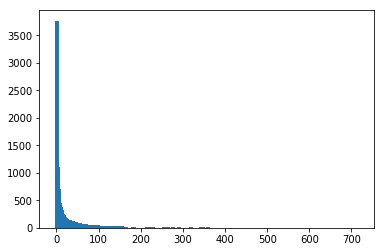

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

words = []
counts = []
for word, count in des_list:
    words.append(word)
    counts.append(count)

#Plot the word count vs.  the rank of the word
x = counts
y = range(0,len(counts))
plt.xlabel("Times Words are Used") 
plt.ylabel("Ranks of Unique Words")
plt.bar(x, y, width=10,)

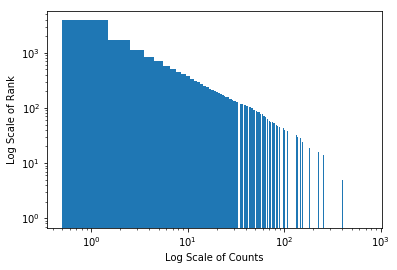

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
words = []
counts = []
for word, count in des_list:
    words.append(word)
    counts.append(count)

#Input data:
x = counts
y = range(0,len(counts))
fig, ax = plt.subplots()
ax.bar(x, y, width=1, log=True)
ax.set_xscale("log")
plt.xlabel("Log Scale of Counts") 
plt.ylabel("Log Scale of Rank")
plt.show()

#### Interpretation:
